In [52]:
# ============================
# STEP 1 – PREPROCESSING FOR CLUSTERING
# ============================
import pandas as pd
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("Dataset/student_performance_cleaned.csv")
df["Participation in Extracurricular Activities"] = df["Participation in Extracurricular Activities"].map({"Yes": 1, "No": 0})
df_clustering = df.drop(columns=["Student ID", "Passed"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clustering)
X_scaled_df = pd.DataFrame(X_scaled, columns=df_clustering.columns)
print("Preprocessing done!")
print(X_scaled_df.head())
print(X_scaled_df.describe())
X_scaled_df.to_csv("Dataset/student_clustering_scaled.csv", index=False)
print("File saved successfully!")

Preprocessing done!
   Study Hours per Week  Attendance Rate  Previous Grades  \
0             -0.132470         0.976820        -0.290718   
1              1.516602         0.071503        -0.182525   
2             -0.231812         0.683204         0.436583   
3             -0.231812        -0.075305         0.232217   
4              1.576207        -1.797854         1.692830   

   Participation in Extracurricular Activities  
0                                    -0.998903  
1                                     1.001098  
2                                    -0.998903  
3                                     1.001098  
4                                    -0.998903  
       Study Hours per Week  Attendance Rate  Previous Grades  \
count          3.098600e+04     3.098600e+04     3.098600e+04   
mean           2.311454e-16     1.055977e-15    -6.310063e-16   
std            1.000016e+00     1.000016e+00     1.000016e+00   
min           -3.887585e+00    -4.386571e+00    -3.434341e+

In [53]:
# ============================
# STEP 2 — ELBOW METHOD (SSE)
# ============================
from sklearn.cluster import KMeans
sse = []
K_values = range(2, 11)
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled_df)
    sse.append(kmeans.inertia_)
sse

[92954.64242314646,
 82955.85720220016,
 73087.65529309769,
 66106.01685850757,
 59548.500918756006,
 54238.61458371518,
 50165.89386795915,
 46024.210497901484,
 43314.64333851896]

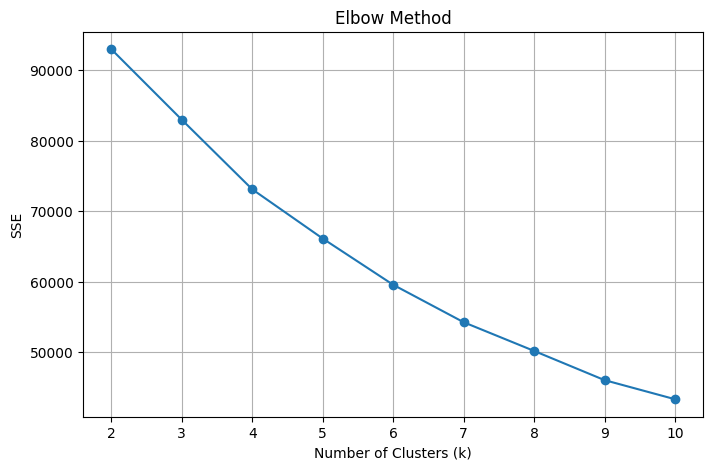

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(K_values, sse, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

In [55]:
# ============================
# STEP 3 — SILHOUETTE SCORE
# ============================
from sklearn.metrics import silhouette_score

sil_scores = []
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled_df)
    sil = silhouette_score(X_scaled_df, labels)
    sil_scores.append(sil)
    print(f"k={k}: Silhouette Score = {sil:.4f}")

k=2: Silhouette Score = 0.2829
k=3: Silhouette Score = 0.2258
k=4: Silhouette Score = 0.2099
k=5: Silhouette Score = 0.2089
k=6: Silhouette Score = 0.2125
k=7: Silhouette Score = 0.2162
k=8: Silhouette Score = 0.2189
k=9: Silhouette Score = 0.2221
k=10: Silhouette Score = 0.2200


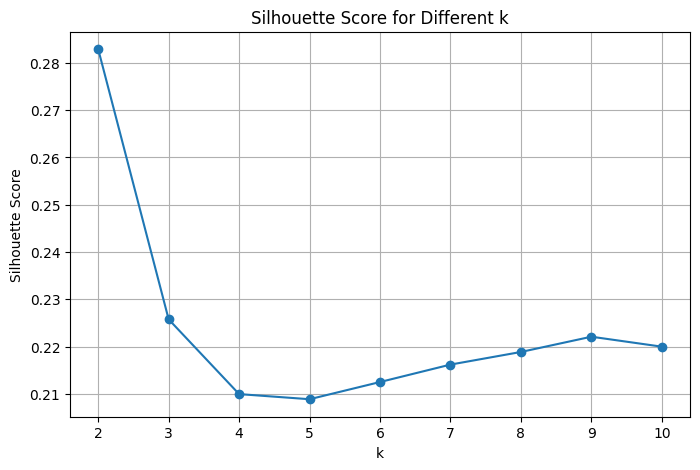

In [56]:
plt.figure(figsize=(8,5))
plt.plot(K_values, sil_scores, marker='o')
plt.title("Silhouette Score for Different k")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [57]:
# ============================
# STEP 4 — FINAL KMEANS (k = 2)
# ============================
best_k = 2
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_scaled_df)
final_sil_score = silhouette_score(X_scaled_df, clusters)
print("Final Silhouette Score =", final_sil_score)
X_scaled_df["Cluster"] = clusters
cluster_centers = X_scaled_df.groupby("Cluster").mean()
cluster_centers


Final Silhouette Score = 0.28290241354353246


,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities
Cluster,,,,
0,-0.008435,-0.002494,-0.005546,-0.998903
1,0.008453,0.002499,0.005558,1.001098
